# Introducción
En este proyecto se procede a solucionar dos problemas computacionales mediante dos estrategias distintas, la aplicación de un algoritmo genético (GA) y la optimización por colonia de hormigas (ACO).

El código utilizado para este proyecto se encuentra en el siguiente repositorio de GitHub [EPDEvaluableII repository](https://github.com/Daiego43/EPDEvaluable2Alg2)


## Problema 1. Algoritmo Genético
Se dispone de una balanza con dos platillos y de n objetos, cada uno de los cuales tiene un peso positivo. El objetivo es encontrar un reparto de los objetos entre los dos platillos de la balanza de forma que la diferencia entre los pesos de los objetos situados en cada platillo sea mínima.  

## Problema 2. Optimización por colonia de hormigas
Se pide implementar un algoritmo de ACO para el problema de la mochila, siguiendo las directrices generales descritas en las clases de EB. Suponga que se dispone de N objetos y que cada uno de ellos tiene asociado un peso (p) y un beneficio (b). El problema consiste en encontrar el subconjunto de objetos de valor máximo que cumpla la restricción de que la suma de sus pesos sea menor o igual que una cota C prefijada (la capacidad de la mochila). Parametrice el problema con 100 objetos con pesos y beneficios comprendidos entre 1 y 100, y con una capacidad máxima de 3000. 

# Resolucion de cuestiones
## 1. Representación de las soluciones
### 1.1. Problema 1
Para resolver el problema de la balanza se ha optado por una solución en forma de vector binario, que posteriormente es traducido a una versión más accesible al usuario que se explica posteriormente.

El vector binario representa todos los objetos que se van a colocar en la balanza, si el objeto tiene un 0 se posiciona en la balanza izquierda, en caso contrario, si tiene un 1 se posiciona en la balanza derecha

Lo exponemos con un ejemplo:

In [1]:
from AlgoritmoGenetico import GA as g

problema1 = g.GeneticAlgorithm()

In [2]:
vectorBinario = problema1.generateRandomIndividual()

print("Estos son los objetos con sus pesos para de la instancia del problema:\n\n", problema1.dictObjetos,"\n")

print("Este es un vector binario para tratar una solucion del problema:", vectorBinario,"\n")

print("Esta es la interpretacion de ese vector binario:", problema1.traducirSolucion(vectorBinario),"\n")

Estos son los objetos con sus pesos para de la instancia del problema:

 {0: 52, 1: 70, 2: 75, 3: 1, 4: 57, 5: 86, 6: 1, 7: 13, 8: 9, 9: 26} 

Este es un vector binario para tratar una solucion del problema: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1] 

Esta es la interpretacion de ese vector binario: [[1, 3, 4, 5, 6, 8], [0, 2, 7, 9]] 



El resultado de la funcion traducirSolucion() es poner en un lado u otro de la balanza el objeto. Aunque finalmente el resultado que nos interesa obtener es el fitness de dicha solución que será mejor mientras mas se aproxime a 0

In [3]:
print("Fitness:", problema1.fitness(vectorBinario))

Fitness: 58


### 1.2. Problema 2
Para resolver el problema de la mochila, se han usado las listas de python simulando una mochila. Cada hormiga tiene su propia mochila en la que va guardando objetos.

Al igual que en el anterior problema el primer paso fue crear un diccionario de objetos a meter en la mochila, los objetos, numerados de 0 a NUM_OBJETOS - 1 tienen su definición en el diccionario en forma de una tupla (peso, valor).

De esta forma un podemos mapear una "mochila" para saber el valor que tiene y el peso que lleva. La solución final que nos retornará el algoritmo será el mejor valor de la mochila aunque también podrá visualizar cuál es la combinación de objetos ganadora.

Los motivos para hacerlo de esta forma un tanto mas distinta, son también para demostrar que la forma en la que decidamos enfrentar un problema es muy influyente en el resultado final. Esto será explicado más en profundidad en el apartado 3.Tiempo promedio

In [4]:
from AntColonyOptimization import ACO as a

problema2 = a.AntColonyOptimization()

In [5]:
value = problema2.ACOSolve()

## 2. Discusión de parámetros introducidos para resolver el problema

### 2.1. Problema 1

In [6]:
problema1.printProblemDetails()

				Problema de la balanza. Algoritmo Genético. Parámetros
Numero de objetos: 10
Rango de pesos 100
Tamaño de poblacion: 10 individuos
Porcentaje de elitismo: 50 %
Probabilidad de mutaciones: 10 %
Numero de iteraciones, Generaciones de individuos: 30
Objetos: {0: 52, 1: 70, 2: 75, 3: 1, 4: 57, 5: 86, 6: 1, 7: 13, 8: 9, 9: 26}


Estos son los parámetros que se han usado para el problema, claramente y para que resulte didáctico, el numero de objetos es bastante reducido para que la visualización de estos datos sea más adecuada.

En los algoritmos genéticos debemos optar por una estrategia de selección sobre la población para que los individuos evolucionen. En este caso y porque interesa intensificar la resolución hacia el óptimo global (fitness = 0) se ha optado por un criterio de selección elitista.

El criterio de selección elitista consistirá en seleccionar a un cierto porcentaje de la población actual cuyo fitness sea más optimo que el de sus congéneres.
Estos individuos de élite son seleccionados para formar parte de la futura generación de forma inmediata, el resto de individuos que compongan esa nueva población serán los hijos de la población actual.

### 2.2. Problema 2

In [7]:
problema2.printProblemDetails()

				Problema de la Mochila. Algoritmo ACO. Parámetros
Numero de objetos: 10
Rango de valores: 100
Rango de pesos: 100
Peso máximo de la mochila: 300
Numero de hormigas utilizadas: 5
Alpha: 0.5
Beta: 0.8
Cantidad de feromona dejada por una hormiga: 500
Porcentaje de eliminacion de feromona 50%
Objetos: {0: (37, 13), 1: (100, 49), 2: (18, 9), 3: (28, 72), 4: (4, 69), 5: (24, 28), 6: (8, 87), 7: (16, 70), 8: (17, 6), 9: (8, 43)}


Lo importante a señalar sobre los parámetros utilizados serán Alpha, Beta y el Porcentaje de eliminación de feromonas.
Alpha y Beta forman parte de la probabilidad de transición de las hormigas, es decir, la probabilidad que tiene una hormiga de coger o no un objeto. Esta probabilidad se basa en la calidad que aporta ese objeto a la solución (valor heurístico, en este caso, valor del objeto en cuestión) y en el rastro que posee (Si las anteriores colonias de hormigas optaron por coger dicho objeto). Alpha y Beta nos sirven para indicar la relevancia de estos aspectos, siendo ambos parámetros un numero real en el intervalo (0, 1).

Si Alpha es 0 ignoraríamos por completo el rastro de las hormigas y nos guiariamos solo por el valor del objeto, si Beta fuese 0 nos guiaríamos solo por el rastro que dejan las hormigas pero no tendríamos información relevante respecto a la solución que queremos encontrar

Finalmente, en cada iteración del programa un cierto porcentaje de feromona o rastro que dejaron las hormigas en cada objeto se actualiza. Que el rastro se actualice quiere decir que cierto porcentaje debe evaporarse (indicado en problemDetails) y además se le debe añadir también una cierta cantidad de feromona en funcion de las hormigas que hayan decidido recogerlo.

Dicho esto, los motivos para escoger los parámetros presentes se deben a que se quiere mantener una buena aproximación heurística (B = 0.8) del problema pero a su vez también queremos dar lugar a cierta diversificación de las soluciones pero no excesivamente ya que muchas veces las hormigas se pueden empezar a guiar por rastros que no llevan a un óptimo global y se pueden estancar en óptimos locales (A = 0.2)

## 3. Tiempo promedio de ejecución, tras 30 ejecuciones

Primero echaremos un vistazo a la ejecución natural del programa y después mostraremos el tiempo medio de ejecución

### 3.1. Problema 1

Ejecución normal del programa

In [8]:
problema1.GASolveVisual()

Diccionario de objetos y pesos:  {0: 52, 1: 70, 2: 75, 3: 1, 4: 57, 5: 86, 6: 1, 7: 13, 8: 9, 9: 26}
Poblacion inicial:
-  [[0, 1, 2], [3, 4, 5, 6, 7, 8, 9]] Fitness: 4
-  [[3, 6], [0, 1, 2, 4, 5, 7, 8, 9]] Fitness: 386
-  [[2, 4, 8, 9], [0, 1, 3, 5, 6, 7]] Fitness: 56
-  [[5, 6], [0, 1, 2, 3, 4, 7, 8, 9]] Fitness: 216
-  [[3, 4, 5, 7, 8], [0, 1, 2, 6, 9]] Fitness: 58
-  [[1, 2, 4, 5, 8], [0, 3, 6, 7, 9]] Fitness: 204
-  [[0, 4, 7], [1, 2, 3, 5, 6, 8, 9]] Fitness: 146
-  [[0, 1, 3, 4, 5, 7, 8], [2, 6, 9]] Fitness: 186
-  [[0, 1, 4, 6, 7, 9], [2, 3, 5, 8]] Fitness: 48
-  [[1, 2, 3, 4, 7, 8, 9], [0, 5, 6]] Fitness: 112
Individuos resultantes tras 30 generaciones
-  [[0, 1, 2], [3, 4, 5, 6, 7, 8, 9]] Fitness: 4
-  [[0, 1, 4, 6, 7], [2, 3, 5, 8, 9]] Fitness: 4
-  [[0, 1, 2, 6], [3, 4, 5, 7, 8, 9]] Fitness: 6
-  [[0, 1, 4, 7], [2, 3, 5, 6, 8, 9]] Fitness: 6
-  [[0, 1, 4, 9], [2, 3, 5, 6, 7, 8]] Fitness: 20
-  [[0, 1, 7], [2, 3, 4, 5, 6, 8, 9]] Fitness: 120
-  [[0, 1, 4], [2, 3, 5, 6, 7, 8, 

In [9]:
media = problema1.tiempo_medio_ejecucion()
print("Tiempo medio tras 30 ejecuciones:", media, "Segundos")

Tiempo medio tras 30 ejecuciones: 0.0022272904713948566 Segundos


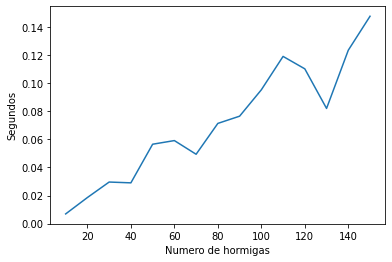

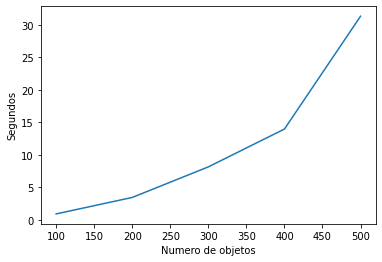

In [10]:
import TimeTester as t

Teniendo en cuenta los parámetros introducidos este es el tiempo de ejecución resultante.
Valores clave como el tamaño de la población o el numero de pesos disponibles son los grandes influyentes en el tiempo de ejecución.
Veamos ahora de forma gráfica cómo afectan los cambios de esos valores al tiempo de ejecución:

##### El tiempo de ejecucion en funcion del numero de individuos en la poblacion
Se fijó el numero de objetos a 10 y se calculó el tiempo medio de ejecucion para poblaciones de 100, 200, 300..., 1000 individuos.

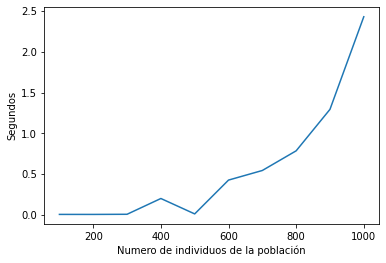

In [11]:
t.plotGADataPoblacion()

Sin hacer demasiado incapié en el estudio más analítico de la gráfica observamos una complejidad cuadrática en el algoritmo. Mientras más individuos ponemos en una población para resolver un problema mediante un algoritmo genético, el tiempo de ejecución crecerá de forma exponencial.

#### El tiempo de ejecucion en funcion del numero de objetos que se quieran colocar en la balanza
Se fijó el tamaño de la población a 10 individuos y nuevamente se calcularon los tiempos de ejecución para 100,200,...,1000 objetos.

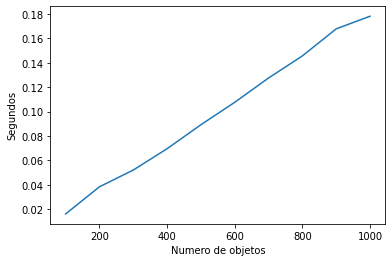

In [12]:
t.plotGADataObjetos()

Se observa una clara complejidad lineal del algoritmo respecto al numero de pesos que se quieren colocar en la balanza.

#### Conclusión
Ya que el numero de objetos y el tamaño poblacional son los datos que influyen de manera directa con la complejidad del algoritmo, podemos concluir que dado que solo aumentar el tamaño de la poblacion de soluciones supone un incremento cuadrático del tiempo y que el numero de objetos supone un incremento lineal. Lo que podemos concluir es que en una ejecución del programa donde se aumenten a la vez estas dos variables, concluye que el algoritmo debe tener una complejidad cúbica.


### 3.2. Problema 2

In [13]:
problema2.ACOSolveVisual()

Hormiga 0: [2, 9, 6, 5, 1, 7, 3, 0, 4, 8]--> valor: 446  peso: 260
Hormiga 1: [7, 3, 5, 1, 4, 6, 9, 0, 8, 2]--> valor: 446  peso: 260
Hormiga 2: [0, 3, 4, 6, 7, 9, 8, 1, 2, 5]--> valor: 446  peso: 260
Hormiga 3: [4, 6, 8, 3, 7, 9, 5, 2, 1, 0]--> valor: 446  peso: 260
Hormiga 4: [9, 5, 7, 2, 4, 6, 3, 8, 1, 0]--> valor: 446  peso: 260

El mejor valor se ha actualizado


Hormiga 0: [6, 7, 3, 5, 4, 9, 0, 1, 2, 8]--> valor: 446  peso: 260
Hormiga 1: [5, 1, 2, 7, 3, 4, 6, 0, 9, 8]--> valor: 446  peso: 260
Hormiga 2: [5, 6, 9, 4, 3, 1, 7, 0, 8, 2]--> valor: 446  peso: 260
Hormiga 3: [6, 4, 9, 1, 0, 7, 5, 3, 2, 8]--> valor: 446  peso: 260
Hormiga 4: [5, 1, 6, 4, 9, 3, 7, 0, 8, 2]--> valor: 446  peso: 260


Hormiga 0: [0, 9, 6, 3, 2, 4, 1, 7, 5, 8]--> valor: 446  peso: 260
Hormiga 1: [4, 3, 7, 6, 2, 9, 5, 1, 8, 0]--> valor: 446  peso: 260
Hormiga 2: [9, 4, 8, 5, 6, 1, 3, 7, 2, 0]--> valor: 446  peso: 260
Hormiga 3: [6, 3, 1, 7, 9, 8, 2, 5, 4, 0]--> valor: 446  peso: 260
Hormiga 4: [6, 9, 1, 7, 

446

In [14]:
media, mejor = problema2.tiempo_medio_ejecucion()
print("Tiempo medio de ejecucion: ", media, "segundos")
print("Mejor solucion encontrada tras las 30 ejecuciones del algoritmo", mejor)

Tiempo medio de ejecucion:  0.0059342543284098305 segundos
Mejor solucion encontrada tras las 30 ejecuciones del algoritmo 446


Una vez ejecutado el algoritmo se procede a hacer un estudio del mismo modificando una serie de parámetros

#### Tiempo de ejecución respecto al número de hormigas utilizadas
Se fijó un peso máximo de 300 kilos, 10 iteraciones y 10 objetos con pesos y valores random en el intervalo (0,100). Se estudió el tiempo de ejecución para este caso de el problema modificando el número de hormigas

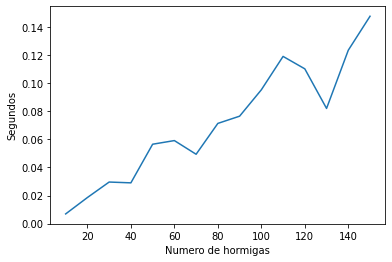

In [15]:
t.plotACODataHormigas()

Vemos unos pequeños que los tiempos de ejecución son algo erráticos pero aún así tienen tendencia lineal y el coste por poner alguna hormiga más es bastante más controlado en comparación con el siguiente resultado.

#### Tiempo de ejecución respecto al numero de objetos a insertar en la mochila
Se fijó un numero de 5 hormigas y un peso máximo de 3000 kilos, probaremos con instancias del problema de 100,200,300,400 y 500 objetos debido a que como se muestra, calcular un tiempo medio de ejecución para el caso de 1000 objetos podía resultar excesivamente costoso temporalmente


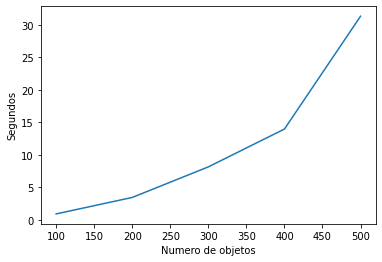

In [16]:
t.plotACODataObjetos()

Vemos que ya para introducir 500 objetos en la mochila el tiempo medio de ejecución alcanza los 30 segundos. También se observa y aproxima a una función cuadrática en cuanto a la complejidad del algoritmo para este parámetro.

#### Conclusión
En cuanto a complejidad la colonia de hormigas coincide con el algoritmo genético en poseer una complejidad cúbica ya que ambos parámetros están estrechamente relacionados (numero de hormigas y numero de objetos).

## 4. Conclusiones

### Sobre el tiempo de ejecución
Cuando acabé la fase de programación realmente me asustó que llegase a tardar tanto tiempo, más aún cuando se somete a comparación con los resultados de mis compañeros que para instancias muy simples de los problemas no sobrepasaban el segundo.

Sin embargo luego fue cuando me puse a investigar el por qué. 
En primer lugar llevé a cabo una breve tarea de optimización del código lo que trajo un notable resultado en cuanto al tiempo de ejecución (en ACO se logró optimizar hasta un 90% el tiempo de ejecución) y aún así seguian siendo programas muy lentos.

Fue llegado este punto cuando caí en la cuenta, estoy programando en python y cuando decimos que python es lento es que puede llegar a ser entre 100 y 200 veces más lento que otros lenguajes de programación como C o Java. 
La razón por la que implementación en python es tan lenta se debe a dos razones:

1. El bajo control que se tiene sobre las estructuras de datos, cuando se simplifica de sobremanera la programación podemos caer en hacer programas que aunque son mucho más simples de escribir, son menos eficientes.

2. El uso de tipado dinámico, los lenguajes de programación compilados como C o Java optimizan muchísimo el tiempo de ejecución debido a que el tipo de datos de las variables se declara en el código. En python esto no ocurre, el intérprete no sabe si una determinada variable se trata de un entero, float, string, list, etc,... hasta que llega el momento de usarla, esto provoca una gran lentitud en un programa de python vs un programa en C o Java

Afortunadamente la lentitud de python puede ser optimizada con retoques simples como: Una parte del código que pueda ser costosa o compleja de ejecutar puede ser sustituida por su implementación en C. Python está basado en C y si usamos una función programada en dicho lenguaje podemos aprovechar su velocidad para optimizar enormemente futuros programas.

### Opinión personal
Lo siento por ser tan pesado pero le agradezco de corazón que me hay dejado usar Python para este trabajo, no solo me ha servido para mejorar programando sino que he aprendido muchísimas cosas nuevas para desarrollar mejores trabajos.
Es un poco triste que yo lo diga pero me parezco un poco a la liebre del cuento. Cuando me tengo que poner a trabajar consigo comprender perfectamente el funcionamiento de los algoritmos y en cierto modo es porque cuando tengo presión por trabajar es cuando realmente aprendo sobre lo que trabajamos en clase, se siente más un reto para mi.

Espero que el trabajo haya sido de su agrado.


@Author: Diego Delgado Chaves

